In [1]:
import numpy as np
import math
import pandas as pd
#statistical libraries
from scipy.stats import norm
from scipy.stats import lognorm
#solving functions
from scipy.optimize import root
from scipy.optimize import brute
from scipy.optimize import minimize
#plotting functions
import seaborn as sns
import matplotlib.pyplot as plt
#interpolation
from scipy.interpolate import interp1d

# Exercise 2.1.1

In [490]:
#define the parameters
T=0.2
S0=100
K=120
r=0.05
Im=22

In [3]:
#define the functions
def w(x):
    return (np.log(K/S0)-(r-x**2/2)*T)/(x*np.sqrt(T))
def I(x):
    return np.exp(-r*T)*K*norm.cdf(w(x))-S0*norm.cdf(w(x)-x*np.sqrt(T))
def sol(x):
    return I(x)-22

In [4]:
solut=root(sol,1)
solut.x

array([0.50837293])

# Exercise 2.1.2

In [491]:
#assign values to parameters
a0=2/(K+S0)
p=1

In [6]:
def f(x):
    g=[0,K-x]
    return np.exp(-r*T)*np.max(g)

In [492]:
#let's first create a function to generate ST
def genST(sigma,t,m):
    x=norm.rvs(size=m)
    dt=T/m
    W=np.append([0],np.cumsum(np.sqrt(dt)*x))
    S=S0*np.exp((r-sigma**2/2)*t+sigma*W)
    return S[-1]

### Algorithm to obtain the plot of the convergence rate on n with N=1, and p=1

In [8]:
t=np.linspace(0,T,51)
m=50
al11=[]
tot=100
for k in range(tot):
    sig=[0.6]
    for i in range(1,1000):
        alphai=a0/i**p
        jhat=(f(genST(sig[i-1],t,m))-Im)
        sig.append(sig[i-1]-alphai*jhat)
    al11.append(sig)

In [9]:
alli11=np.array(al11)
alli11=(alli11-solut.x)**2

In [10]:
appr11=[]
ex=[]
for i in range(1,1000):
    appr11.append(np.mean(alli11[:,i]))
    ex.append(i)

### plot with N=1, p=0.8

In [13]:
p=0.8

In [14]:
t=np.linspace(0,T,51)
m=50
al081=[]
tot=100
for k in range(tot):
    sig=[0.6]
    for i in range(1,1000):
        alphai=a0/i**p
        jhat=(f(genST(sig[i-1],t,m))-Im)
        sig.append(sig[i-1]-alphai*jhat)
    al081.append(sig)

In [16]:
alli081=np.array(al081)
alli081=(alli081-solut.x)**2

In [17]:
appr081=[]
ex=[]
for i in range(1,1000):
    appr081.append(np.mean(alli081[:,i]))
    ex.append(i)

Actually the convergence rate with p=0.8 is better than the other one, here we have something near 1/sqrt(n*N) while in the other one the convergence rate is near (n*N)^0.25

### plot with N=10, p=1

In [27]:
p=1

In [28]:
t=np.linspace(0,T,51)
m=50
N=10
tot=100
al110=[]
for k in range(tot):
    sig=[0.6]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genST(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al110.append(sig)

In [29]:
alli110=np.array(al110)
alli110=(alli110-solut.x)**2

In [30]:
appr110=[]
ex10=[]
for i in range(1,1000):
    appr110.append(np.mean(alli110[:,i]))
    ex10.append(i*10)

### plot with N=10, p=0.8

In [32]:
p=0.8

In [33]:
t=np.linspace(0,T,51)
m=50
N=10
tot=100
al0810=[]
for k in range(tot):
    sig=[0.6]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genST(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al0810.append(sig)

In [34]:
alli0810=np.array(al0810)
alli0810=(alli0810-solut.x)**2

In [35]:
appr0810=[]
for i in range(1,1000):
    appr0810.append(np.mean(alli0810[:,i]))

## Final subplot with all the results

In [37]:
ex=np.array(ex)
ex10=np.array(ex10)
nmin051=ex**float(-0.5)
nmin0510=ex10**float(-0.5)
nmin0251=ex**float(-0.25)
nmin02510=ex10**float(-0.25)
pldf=pd.DataFrame()
pldf['xax']=ex
pldf['xax10']=ex10
pldf['N1p1']=appr11
pldf['N1p08']=appr081
pldf['N10p1']=appr110
pldf['N10p08']=appr0810
pldf['nmin051']=nmin051
pldf['nmin0510']=nmin0510
pldf['nmin0251']=nmin0251
pldf['nmin02510']=nmin02510
pldf

,xax,xax10,N1p1,N1p08,N10p1,N10p08,nmin051,nmin0510,nmin0251,nmin02510
0,1,10,0.036774,0.040141,0.010012,0.008578,1.000000,0.316228,1.000000,0.562341
1,2,20,0.043951,0.041036,0.009031,0.008458,0.707107,0.223607,0.840896,0.472871
2,3,30,0.045556,0.042137,0.008501,0.008299,0.577350,0.182574,0.759836,0.427287
3,4,40,0.047636,0.041968,0.007973,0.008063,0.500000,0.158114,0.707107,0.397635
4,5,50,0.044724,0.040062,0.007455,0.007736,0.447214,0.141421,0.668740,0.376060
...,...,...,...,...,...,...,...,...,...,...
994,995,9950,0.013756,0.003055,0.001865,0.000444,0.031702,0.010025,0.178051,0.100125
995,996,9960,0.013752,0.003057,0.001864,0.000443,0.031686,0.010020,0.178006,0.100100
996,997,9970,0.013755,0.003060,0.001863,0.000444,0.031670,0.010015,0.177962,0.100075
997,998,9980,0.013749,0.003053,0.001863,0.000444,0.031654,0.010010,0.177917,0.100050


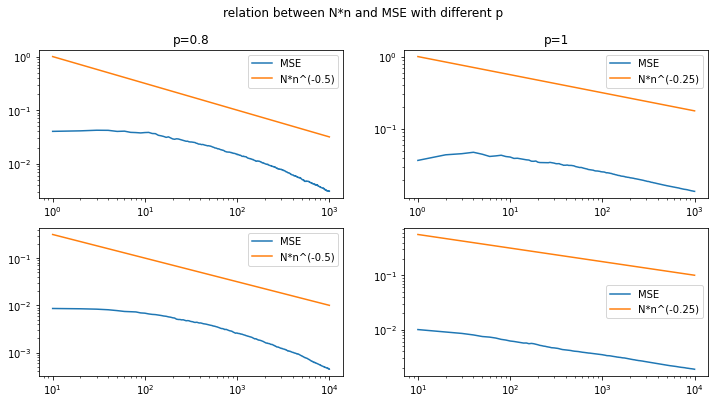

In [225]:
fig, ax=plt.subplots(2,2,figsize=(12,6))
sns.lineplot(x='xax',y='N1p08',data=pldf, label='MSE',ax=ax[0,0])
sns.lineplot(x='xax',y='nmin051',data=pldf,label='N*n^(-0.5)',ax=ax[0,0])
sns.lineplot(x='xax',y='N1p1',data=pldf,label='MSE',ax=ax[0,1])
sns.lineplot(x='xax',y='nmin0251',data=pldf,label='N*n^(-0.25)',ax=ax[0,1])
sns.lineplot(x='xax10',y='N10p08',data=pldf,label='MSE',ax=ax[1,0])
sns.lineplot(x='xax10',y='nmin0510',data=pldf,label='N*n^(-0.5)',ax=ax[1,0])
sns.lineplot(x='xax10',y='N10p1',data=pldf,label='MSE',ax=ax[1,1])
sns.lineplot(x='xax10',y='nmin02510',data=pldf,label='N*n^(-0.25)',ax=ax[1,1])
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xscale('log')
ax[0,0].set_ylabel('')
ax[0,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,0].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
fig.suptitle('relation between N*n and MSE with different p')
ax[0,0].set_title('p=0.8')
ax[0,1].set_title('p=1')
plt.show()

### with N=1 and p=0.8

In [493]:
p=0.8

In [494]:
t=np.linspace(0,T,51)
m=50
res1=[]
tot=100
for k in range(tot):
    sig=[0.52]
    for i in range(1,1000):
        alphai=a0/i**p
        jhat=(f(genST(sig[i-1],t,m))-Im)
        sig.append(sig[i-1]-alphai*jhat)
    res1.append(sig[-1])

In [495]:
print(np.mean(res1))
MSE1=np.mean((np.array(res1)-solut.x)**2)
print(MSE1)

0.5075196586800338
0.0024044820144850433


### N=10 and p=0.8

In [496]:
t=np.linspace(0,T,51)
m=50
res10=[]
N=10
tot=100
for k in range(tot):
    sig=[0.52]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genST(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    res10.append(sig[-1])

In [497]:
print(np.mean(res10))
MSE10=np.mean((np.array(res10)-solut.x)**2)
print(MSE10)

0.5050665519159816
0.00026768763600604315


### N=100 and p=0.8

In [498]:
t=np.linspace(0,T,51)
m=50
res100=[]
N=100
tot=100
for k in range(tot):
    sig=[0.52]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genST(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    res100.append(sig[-1])

In [499]:
print(np.mean(res100))
MSE100=np.mean((np.array(res100)-solut.x)**2)
print(MSE100)

0.5093894195023876
2.3533035946350744e-05


### N=1, p=1

In [500]:
p=1

In [501]:
t=np.linspace(0,T,51)
m=50
res11=[]
tot=100
for k in range(tot):
    sig=[0.52]
    for i in range(1,1000):
        alphai=a0/i**p
        jhat=(f(genST(sig[i-1],t,m))-Im)
        sig.append(sig[i-1]-alphai*jhat)
    res11.append(sig[-1])

In [502]:
print(np.mean(res11))
MSE11=np.mean((np.array(res11)-solut.x)**2)
print(MSE11)

0.49350713369541505
0.00989570144344507


### N=10, p=1

In [503]:
t=np.linspace(0,T,51)
m=50
res101=[]
N=10
tot=100
for k in range(tot):
    sig=[0.52]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genST(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    res101.append(sig[-1])

In [504]:
print(np.mean(res101))
MSE101=np.mean((np.array(res101)-solut.x)**2)
print(MSE101)

0.5107120054076103
0.0007169553499343744


### N=100, p=1

In [505]:
t=np.linspace(0,T,51)
m=50
res1001=[]
N=100
tot=100
for k in range(tot):
    sig=[0.52]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genST(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    res1001.append(sig[-1])

In [506]:
print(np.mean(res1001))
MSE1001=np.mean((np.array(res1001)-solut.x)**2)
print(MSE1001)

0.5130238076445875
0.00013036620458273335


In [511]:
n=np.array([1000,10000,100000])
nmin05=n**float(-0.5)
nmin1=n**float(-1)
nmin2=n**float(-2)
plotdf=pd.DataFrame()
plotdf['MSE0.8']=np.array([MSE1,MSE10,MSE100])
plotdf['MSE1']=np.array([MSE11,MSE101,MSE1001])
plotdf['nmin0.5']=nmin05
plotdf['nmin1']=nmin1
plotdf['nmin2']=nmin2
plotdf['n']=n
plotdf

,MSE0.8,MSE1,nmin0.5,nmin1,nmin2,n
0,0.002404,0.009896,0.031623,0.00100,1.000000e-06,1000
1,0.000268,0.000717,0.010000,0.00010,1.000000e-08,10000
2,0.000024,0.000130,0.003162,0.00001,1.000000e-10,100000


As observed before the MSE for p=0.8 is smaller than the other one

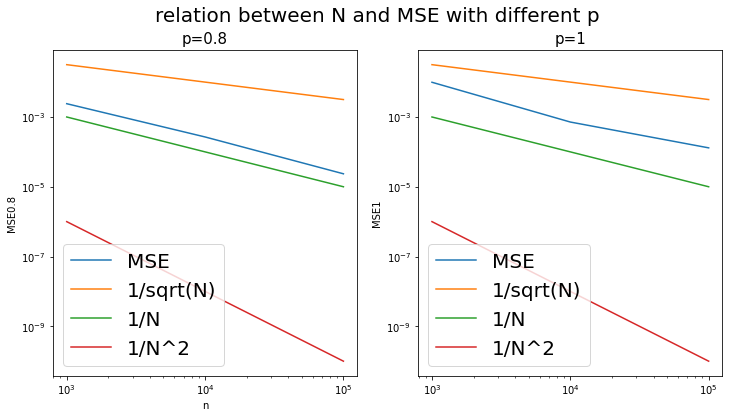

In [596]:
fig, ax=plt.subplots(1,2,figsize=(12,6))
sns.lineplot(x='n',y='MSE0.8',data=plotdf, label='MSE',ax=ax[0])
sns.lineplot(x=n,y='nmin0.5',data=plotdf,label='1/sqrt(N)',ax=ax[0])
sns.lineplot(x=n,y='nmin1',data=plotdf,label='1/N',ax=ax[0])
sns.lineplot(x=n,y='nmin2',data=plotdf,label='1/N^2',ax=ax[0])
sns.lineplot(x=n,y='MSE1',data=plotdf,label='MSE',ax=ax[1])
sns.lineplot(x=n,y='nmin0.5',data=plotdf,label='1/sqrt(N)',ax=ax[1])
sns.lineplot(x=n,y='nmin1',data=plotdf,label='1/N',ax=ax[1])
sns.lineplot(x=n,y='nmin2',data=plotdf,label='1/N^2',ax=ax[1])
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
fig.suptitle('relation between N and MSE with different p',size=20)
ax[0].set_title('p=0.8',size=15)
ax[1].set_title('p=1',size=15)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
plt.show()

The MSE goes like 1/N

# Exercise 2.2.5

In [8]:
### in the end we will use p=0.8 for the convergence parameter alphan because of its better performances
p=0.8

In [9]:
#let's first create a function to generate S bar
def genSbar(sigma,t,m):
    x=norm.rvs(size=m)
    dt=T/m
    W=np.cumsum(np.sqrt(dt)*x)
    S=S0*np.exp((r-sigma**2/2)*t[1:]+sigma*W)
    return np.mean(S)

In [10]:
t=np.linspace(0,T,51)
m=50
al=[]
N=10
tot=10
for k in range(tot):
    sig=[0.7]
    for i in range(1,10000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genSbar(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al.append(sig)

In [11]:
alli=np.array(al)

In [17]:
ex=[]
vals=[]
varss=[]
for i in range(10000):
    vals.append(np.mean(alli[:,i]))
    ex.append(i)
    varss.append(np.var(alli[:,i]))

<AxesSubplot:>

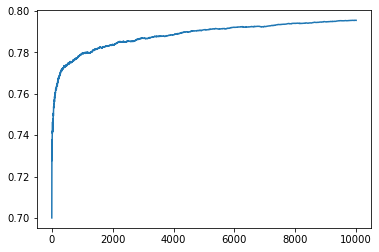

In [18]:
sns.lineplot(x=ex,y=vals)

In [19]:
vals[-1]

0.7955153720227341

In [73]:
#sanity check that the result is near the real sigma
check=[]
for i in range(100000):
    check.append(f(genSbar(vals[-1],t,m)))
print(np.mean(check))

21.782296540921433


<AxesSubplot:>

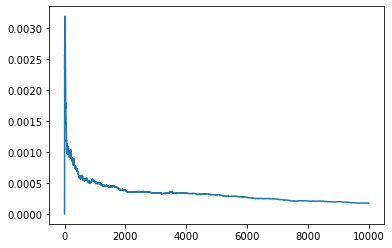

In [20]:
sns.lineplot(x=ex,y=varss)

### Monitoring the convergence

Now to monitor the convergence of my algorithm I first will find the 'real' solution with a big number of n for RM

In [121]:
### I define the function whose I should find the root
def realsol(sigma):
    Isig=[]
    for i in range(1000000):
        Isig.append(f(genSbar(sigma,t,m)))
    return 22-np.mean(Isig)

In [50]:
def zero(x):
    return 0

In [136]:
sigmas=np.linspace(0.795,0.815,10)
sols=[]
for i in range(10):
    sols.append(realsol(sigmas[i]))

In [137]:
realfun=interp1d(sigmas,sols,kind='cubic')

<AxesSubplot:>

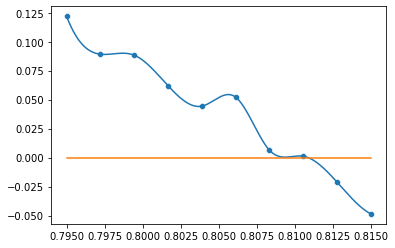

In [140]:
sns.scatterplot(x=sigmas,y=sols)
sns.lineplot(x=np.linspace(0.795,0.815,1000),y=realfun(np.linspace(0.795,0.815,1000)))
sns.lineplot(x=np.linspace(0.795,0.815,1000),y=zero(np.linspace(0.795,0.815,1000)))

The approximations for the 10 values of sigma in the interval are not that bad, because the function is almost monothone decreasing, the interpolation function maybe could be better

In [141]:
#here we find the root of our function which should be the real sigma for our new problem
realsig=root(realfun,0.8) 
realsig.x

array([0.80935446])

In [142]:
#is the algorithm working properly?
check=[]
for i in range(10000000):
    check.append(f(genSbar(realsig.x,t,m)))
print(np.mean(check))

21.98858279582933


The check shows that we can take the value obtained as 'real' solution, actually it seems not to be far from the real solution, so now we can plot the mse

In [24]:
MSE=[]
for i in range(10000):
    MSE.append(np.mean((alli[:,i]-realsig)**2))

<ipython-input-167-422ededbbce3>:3: RuntimeWarning: divide by zero encountered in power
  plot=sns.lineplot(x=ex,y=ex**(-1/3))


[None, None]

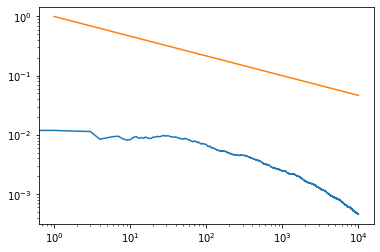

In [167]:
ex=np.array(ex)
plot=sns.lineplot(x=ex,y=MSE)
plot=sns.lineplot(x=ex,y=ex**(-1/3))
plot.set(xscale='log',yscale='log')

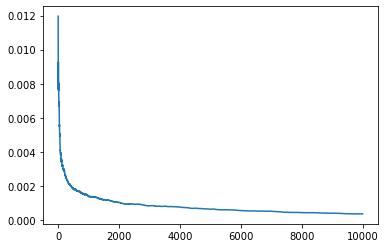

In [27]:
ex=np.array(ex)
plot=sns.lineplot(x=ex,y=MSE)

The MSE starts to be small after 2000 iterations actually

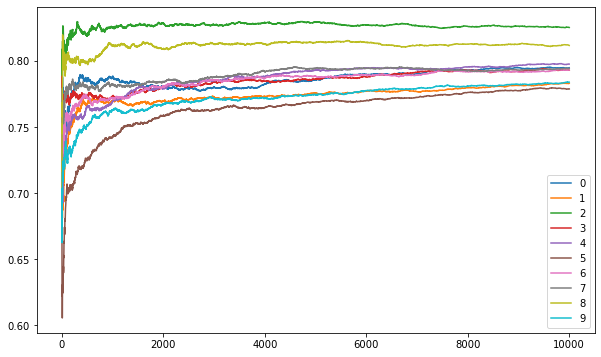

In [14]:
fig,plot=plt.subplots(1,1,figsize=(10,6))
for i in range(10):
    plot=sns.lineplot(x=ex, y=al[i],label=i)
    plot.legend()

In [528]:
K=120
a0=2/(K+S0)
Im=22
t=np.linspace(0,T,51)
m=50
al=[]
N=10
tot=10
tol=10**(-6)
for k in range(tot):
    sig=[0.75]
    esc=1
    i=1
    while esc>tol and i<15000:
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            fun.append(f(genSbar(sig[i-1],t,m))-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
        if i>=3000:
            esc=np.abs(sig[i]-sig[i-3000])
        i+=1
    al.append(sig)

In [529]:
for i in range(tot):
    print(len(al[i]))
    print(al[i][-1])
    print(alli[i,-1])

15000
0.7237227230370308
0.7947666615811865
15000
0.7725099057126985
0.782976795106401
7089
0.8230631857593877
0.8252486097322879
15000
0.7811562558940448
0.7929976547523657
5022
0.8087492213397554
0.7975439715744379
15000
0.7923257483794335
0.7786658226526335
15000
0.7388571192180236
0.7930946184236937
15000
0.779206432361851
0.7943207836710586
5378
0.797310877884851
0.8116417918263226
6884
0.8009541188896037
0.7838970109069541


# Exercise 2.2.6

In [46]:
#it can't be with K=150 because there would be no solution
(150-S0*np.mean(np.exp(r*t)))*np.exp(-r*T)

49.005795970472434

In [47]:
#I assign a new value to Im because with Im=22 there is no solution, I arbitrarily chose 50
Im=50
K=150
a0=2/(K+S0)

### Let's first find the sigma for this value of sigma for Im=50

In [48]:
### I define the function whose I should find the root
def realsol(sigma):
    Isig=[]
    for i in range(1000000):
        Isig.append(f(genSbar(sigma,t,m)))
    return 50-np.mean(Isig)

In [55]:
sigmas=np.linspace(0.95,1.05,10)
sols=[]
for i in range(10):
    sols.append(realsol(sigmas[i]))

In [56]:
realfun=interp1d(sigmas,sols,kind='cubic')

<AxesSubplot:>

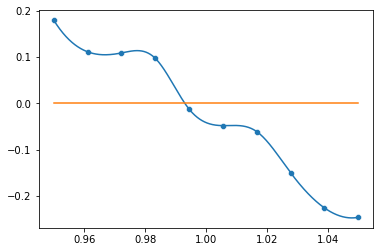

In [59]:
sns.scatterplot(x=sigmas,y=sols)
sns.lineplot(x=np.linspace(0.95,1.05,1000),y=realfun(np.linspace(0.95,1.05,1000)))
sns.lineplot(x=np.linspace(0.95,1.05,1000),y=zero(np.linspace(0.95,1.05,1000)))

In [58]:
#here we find the root of our function which should be the real sigma for our new problem
realsig=root(realfun,1.03) 
realsig.x

array([0.99305256])

In [60]:
#is the algorithm working properly?
check=[]
for i in range(10000000):
    check.append(f(genSbar(realsig.x,t,m)))
print(np.mean(check))

49.97669082509616


This value of sigma could be taken as true value

## Part a: implement importance sampling to estimate Jhat in a better way than with a crude Monte Carlo technique

In [532]:
K=150
a0=2/(K+S0)

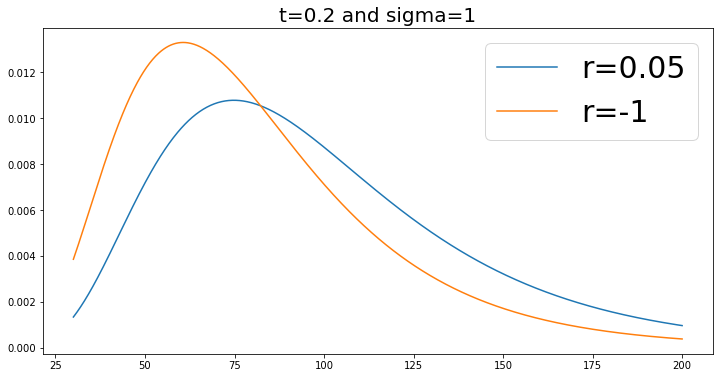

In [599]:
#maybe negative
t=0.2
sig=1
# standard deviation of normal distribution
sigma = sig*np.sqrt(t) 
# mean of normal distribution
mu = np.log(S0)+(r-sig**2/2)*t
mu2= np.log(S0)+(-1-sig**2/2)*t
# total is the value where you need the pdf
total = np.linspace(30,200,1000)

fig, ax=plt.subplots(1,1,figsize=(12,6))
frozen_lognorm = lognorm(s=sigma, scale=math.exp(mu))
frozen_lognorm2= lognorm(s=sigma, scale=math.exp(mu2))
plot=sns.lineplot(x=total,y=frozen_lognorm.pdf(total),label='r=0.05')
plot=sns.lineplot(x=total,y=frozen_lognorm2.pdf(total),label='r=-1')
plot.set_title('t=0.2 and sigma=1',size=20)
plot.legend(fontsize=30)

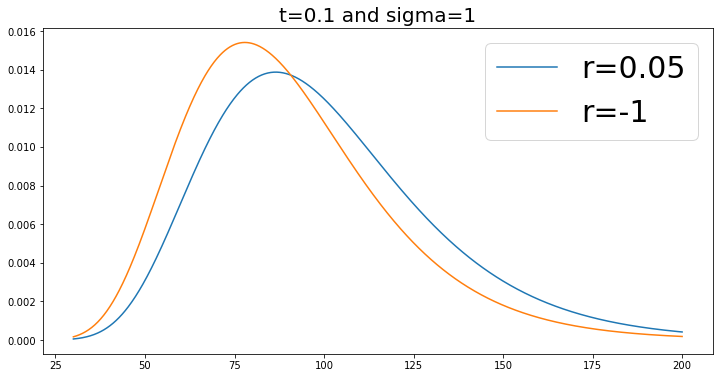

In [600]:
#maybe negative
t=0.1
sig=1
# standard deviation of normal distribution
sigma = sig*np.sqrt(t) 
# mean of normal distribution
mu = np.log(S0)+(r-sig**2/2)*t
mu2= np.log(S0)+(-1-sig**2/2)*t
# total is the value where you need the pdf
total = np.linspace(30,200,1000)

fig, ax=plt.subplots(1,1,figsize=(12,6))
frozen_lognorm = lognorm(s=sigma, scale=math.exp(mu))
frozen_lognorm2= lognorm(s=sigma, scale=math.exp(mu2))
plot=sns.lineplot(x=total,y=frozen_lognorm.pdf(total),label='r=0.05')
plot=sns.lineplot(x=total,y=frozen_lognorm2.pdf(total),label='r=-1')
plot.set_title('t=0.1 and sigma=1',size=20)
plot.legend(fontsize=30)

doing so as we can notice the probability of being bigger than 150 decrease

In [335]:
#probability of being bigger than K for all the St with the normal r 
df=pd.DataFrame()
t=np.linspace(0,T,51)
sig=1
first=[]
for ti in t[1:]:

# standard deviation of normal distribution
    sigma = sig*np.sqrt(ti)
# mean of normal distribution
    mu = np.log(S0)+(-3-sig**2/2)*ti

    frozen_lognorm = lognorm(s=sigma, scale=math.exp(mu))
#calculate the probability of being bigger than K (150) with T (0.2) 
    first.append(1-frozen_lognorm.cdf(150))

In [338]:
#r=-1
sig=1
second=[]
for ti in t[1:]:
# standard deviation of normal distribution
    sigma = sig*np.sqrt(ti)
# mean of normal distribution
    mu = np.log(S0)+(-100-sig**2/2)*ti

    frozen_lognorm = lognorm(s=sigma, scale=math.exp(mu))
    second.append(1-frozen_lognorm.cdf(150))

In [62]:
def genSbar2(sigma,t,m,r):
    x=norm.rvs(size=m)
    dt=T/m
    W=np.cumsum(np.sqrt(dt)*x)
    S=S0*np.exp((r-sigma**2/2)*t[1:]+sigma*W)
    return np.mean(S), S

In [63]:
#This function is actually useful also for the last exercise
def genSbarseed(sigma,t,m,r, seed):
    x=norm.rvs(size=m, random_state=seed)
    dt=T/m
    W=np.cumsum(np.sqrt(dt)*x)
    S=S0*np.exp((r-sigma**2/2)*t[1:]+sigma*W)
    return np.mean(S), S

In [65]:
#check that it is generating always the same S
t=np.linspace(0,T,51)
m=50
s1,S=genSbarseed(1,t,m,r, 1)
s2,S=genSbarseed(1,t,m,r, 1)
print(s1)
print(s2)

82.90945795125356
82.90945795125356


Now let's run the importance sampling algorithm with the value of r tilda I proposed and see how big is the difference in the performances

In [417]:
def fdivg(x,r,nu,sig,dt):
    res=1
    for i in range(1, len(x)):
        res*=norm.pdf((np.log(x[i]/x[i-1])-(r-sig**2/2)*dt)/(sig*np.sqrt(dt)))/norm.pdf((np.log(x[i]/x[i-1])-(nu-sig**2/2)*dt)/(sig*np.sqrt(dt)))
    res*=norm.pdf((np.log(x[0]/S0)-(r-sig**2/2)*dt)/(sig*np.sqrt(dt)))/norm.pdf((np.log(x[0]/S0)-(nu-sig**2/2)*dt)/(sig*np.sqrt(dt)))
    return res  


## differences in variances for different sigma 

### We first compute CMC to find the value of I for different sigmas, because we don't expect CMC to work bad in this situation

knowing that our true sigma is near 1 what I will do is to see how much is the variance reduction with IS with values of sigma that are near our 'real' solution

In [117]:
vediamo=[]
for i in range(1000000):
    vediamo.append(f(genSbar(1,t,m)))
np.mean(vediamo)

50.01948339963301

In [68]:
vediamo=[]
for i in range(1000000):
    vediamo.append(f(genSbar(0.95,t,m)))
np.mean(vediamo)

49.79936964760034

In [69]:
vediamo=[]
for i in range(1000000):
    vediamo.append(f(genSbar(1.05,t,m)))
np.mean(vediamo)

50.21723588761822

### Now we are going to show how much is the variance reduction and also the MSE assuming that those we have found are the real values of I for the three sigma

### sigma=1

In [87]:
t=np.linspace(0,T,51)
m=50
n=1000
N=[9,99,999]
CMC=np.zeros((10,3))
for h in range(10):
    fun=[]
    for k in range(n):
        s, _=genSbar2(1,t,m,r)
        fun.append(f(s))
        if(k in N):
            CMC[h,int(np.log10(k+1))-1]=np.mean(fun)

In [88]:
t=np.linspace(0,T,51)
m=50
dt=T/m
n=1000
N=[9,99,999]
IS=np.zeros((10,3))
for h in range(10):
    fun=[]
    for k in range(n):
        s, S_int=genSbar2(1,t,m,-1)
        ratio=fdivg(S_int,r,-1,1,dt)
        fun.append(f(s)*ratio)
        if(k in N):
            IS[h,int(np.log10(k+1))-1]=np.mean(fun)

In [305]:
CMCvar=[]
CMCMSE=[]
ISvar=[]
ISMSE=[]
ex=[]
for i in range(3):
    CMCvar.append(np.var(CMC[:,i]))
    ISvar.append(np.var(IS[:,i]))
    CMCMSE.append(np.mean((CMC[:,i]-50.01948339963301)**2))
    ISMSE.append(np.mean((IS[:,i]-50.01948339963301)**2))
    ex.append(10**(i+1))

### sigma=0.95

In [71]:
t=np.linspace(0,T,51)
m=50
n=1000
N=[9,99,999]
CMC095=np.zeros((10,3))
for h in range(10):
    fun=[]
    for k in range(n):
        s, _=genSbar2(0.95,t,m,r)
        fun.append(f(s))
        if(k in N):
            CMC095[h,int(np.log10(k+1))-1]=np.mean(fun)

In [72]:
t=np.linspace(0,T,51)
m=50
dt=T/m
n=1000
N=[9,99,999]
IS095=np.zeros((10,3))
for h in range(10):
    fun=[]
    for k in range(n):
        s, S_int=genSbar2(0.95,t,m,-1)
        ratio=fdivg(S_int,r,-1,0.95,dt)
        fun.append(f(s)*ratio)
        if(k in N):
            IS095[h,int(np.log10(k+1))-1]=np.mean(fun)

In [306]:
CMCvar095=[]
CMCMSE095=[]
ISvar095=[]
ISMSE095=[]
ex=[]
for i in range(3):
    CMCvar095.append(np.var(CMC095[:,i]))
    ISvar095.append(np.var(IS095[:,i]))
    CMCMSE095.append(np.mean((CMC095[:,i]-49.79936964760034)**2))
    ISMSE095.append(np.mean((IS095[:,i]-49.79936964760034)**2))
    ex.append(10**(i+1))

### sigma=1.05

In [84]:
t=np.linspace(0,T,51)
m=50
n=1000
N=[9,99,999]
CMC105=np.zeros((10,3))
for h in range(10):
    fun=[]
    for k in range(n):
        s, _=genSbar2(1.05,t,m,r)
        fun.append(f(s))
        if(k in N):
            CMC105[h,int(np.log10(k+1))-1]=np.mean(fun)

In [77]:
t=np.linspace(0,T,51)
m=50
dt=T/m
n=1000
N=[9,99,999]
IS105=np.zeros((10,3))
for h in range(10):
    fun=[]
    for k in range(n):
        s, S_int=genSbar2(1.05,t,m,-1)
        ratio=fdivg(S_int,r,-1,1.05,dt)
        fun.append(f(s)*ratio)
        if(k in N):
            IS105[h,int(np.log10(k+1))-1]=np.mean(fun)

In [307]:
CMCvar105=[]
CMCMSE105=[]
ISvar105=[]
ISMSE105=[]
ex=[]
for i in range(3):
    CMCvar105.append(np.var(CMC105[:,i]))
    ISvar105.append(np.var(IS105[:,i]))
    CMCMSE105.append(np.mean((CMC105[:,i]-50.21723588761822)**2))
    ISMSE105.append(np.mean((IS105[:,i]-50.21723588761822)**2))
    ex.append(10**(i+1))

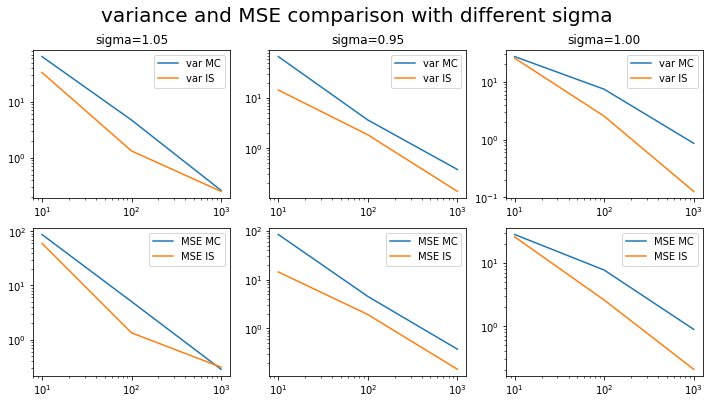

In [311]:
fig,ax=plt.subplots(2,3,figsize=(12,6))
sns.lineplot(x=ex,y=CMCvar105,label='var MC',ax=ax[0,0])
sns.lineplot(x=ex,y=ISvar105, label='var IS',ax=ax[0,0])
sns.lineplot(x=ex,y=CMCMSE105, label='MSE MC',ax=ax[1,0])
sns.lineplot(x=ex,y=ISMSE105, label='MSE IS',ax=ax[1,0])
sns.lineplot(x=ex,y=CMCvar095,label='var MC',ax=ax[0,1])
sns.lineplot(x=ex,y=ISvar095, label='var IS',ax=ax[0,1])
sns.lineplot(x=ex,y=CMCMSE095, label='MSE MC',ax=ax[1,1])
sns.lineplot(x=ex,y=ISMSE095, label='MSE IS',ax=ax[1,1])
sns.lineplot(x=ex,y=CMCvar,label='var MC',ax=ax[0,2])
sns.lineplot(x=ex,y=ISvar, label='var IS',ax=ax[0,2])
sns.lineplot(x=ex,y=CMCMSE, label='MSE MC',ax=ax[1,2])
sns.lineplot(x=ex,y=ISMSE, label='MSE IS',ax=ax[1,2])
ax[0,0].set(xscale='log',yscale='log')
ax[1,0].set(xscale='log',yscale='log')
ax[0,2].set(xscale='log',yscale='log')
ax[1,2].set(xscale='log',yscale='log')
ax[0,1].set(xscale='log',yscale='log')
ax[1,1].set(xscale='log',yscale='log')
fig.suptitle('variance and MSE comparison with different sigma',size=20)
ax[0,0].set_title('sigma=1.05')
ax[0,1].set_title('sigma=0.95')
ax[0,2].set_title('sigma=1.00')
plt.show()

## Now do the plot with 10000

In [475]:
t=np.linspace(0,T,51)
m=50
n=10000
N=[9,99,999,9999]
CMC095new=np.zeros((10,4))
for h in range(10):
    fun=[]
    for k in range(n):
        s, _=genSbar2(0.95,t,m,r)
        fun.append(f(s))
        if(k in N):
            CMC095new[h,int(np.log10(k+1))-1]=np.mean(fun)

In [476]:
t=np.linspace(0,T,51)
m=50
dt=T/m
n=10000
N=[9,99,999,9999]
IS095new=np.zeros((10,4))
for h in range(10):
    fun=[]
    for k in range(n):
        s, S_int=genSbar2(0.95,t,m,-1)
        ratio=fdivg(S_int,r,-1,0.95,dt)
        fun.append(f(s)*ratio)
        if(k in N):
            IS095new[h,int(np.log10(k+1))-1]=np.mean(fun)

In [477]:
t=np.linspace(0,T,51)
m=50
n=10000
N=[9,99,999,9999]
CMC1new=np.zeros((10,4))
for h in range(10):
    fun=[]
    for k in range(n):
        s, _=genSbar2(1,t,m,r)
        fun.append(f(s))
        if(k in N):
            CMC1new[h,int(np.log10(k+1))-1]=np.mean(fun)

In [478]:
t=np.linspace(0,T,51)
m=50
n=10000
N=[9,99,999,9999]
CMC105new=np.zeros((10,4))
for h in range(10):
    fun=[]
    for k in range(n):
        s, _=genSbar2(1.05,t,m,r)
        fun.append(f(s))
        if(k in N):
            CMC105new[h,int(np.log10(k+1))-1]=np.mean(fun)

In [479]:
t=np.linspace(0,T,51)
m=50
dt=T/m
n=10000
N=[9,99,999,9999]
IS1new=np.zeros((10,4))
for h in range(10):
    fun=[]
    for k in range(n):
        s, S_int=genSbar2(1,t,m,-1)
        ratio=fdivg(S_int,r,-1,1,dt)
        fun.append(f(s)*ratio)
        if(k in N):
            IS1new[h,int(np.log10(k+1))-1]=np.mean(fun)

In [480]:
t=np.linspace(0,T,51)
m=50
dt=T/m
n=10000
N=[9,99,999,9999]
IS105new=np.zeros((10,4))
for h in range(10):
    fun=[]
    for k in range(n):
        s, S_int=genSbar2(1.05,t,m,-1)
        ratio=fdivg(S_int,r,-1,1.05,dt)
        fun.append(f(s)*ratio)
        if(k in N):
            IS105new[h,int(np.log10(k+1))-1]=np.mean(fun)

In [481]:
CMCvar105=[]
CMCMSE105=[]
ISvar105=[]
ISMSE105=[]
ex=[]
for i in range(4):
    CMCvar105.append(np.var(CMC105new[:,i]))
    ISvar105.append(np.var(IS105new[:,i]))
    CMCMSE105.append(np.mean((CMC105new[:,i]-50.21723588761822)**2))
    ISMSE105.append(np.mean((IS105new[:,i]-50.21723588761822)**2))
    ex.append(10**(i+1))

In [482]:
CMCvar095=[]
CMCMSE095=[]
ISvar095=[]
ISMSE095=[]
ex=[]
for i in range(4):
    CMCvar095.append(np.var(CMC095new[:,i]))
    ISvar095.append(np.var(IS095new[:,i]))
    CMCMSE095.append(np.mean((CMC095new[:,i]-49.79936964760034)**2))
    ISMSE095.append(np.mean((IS095new[:,i]-49.79936964760034)**2))
    ex.append(10**(i+1))

In [483]:
CMCvar=[]
CMCMSE=[]
ISvar=[]
ISMSE=[]
ex=[]
for i in range(4):
    CMCvar.append(np.var(CMC1new[:,i]))
    ISvar.append(np.var(IS1new[:,i]))
    CMCMSE.append(np.mean((CMC1new[:,i]-50.01948339963301)**2))
    ISMSE.append(np.mean((IS1new[:,i]-50.01948339963301)**2))
    ex.append(10**(i+1))

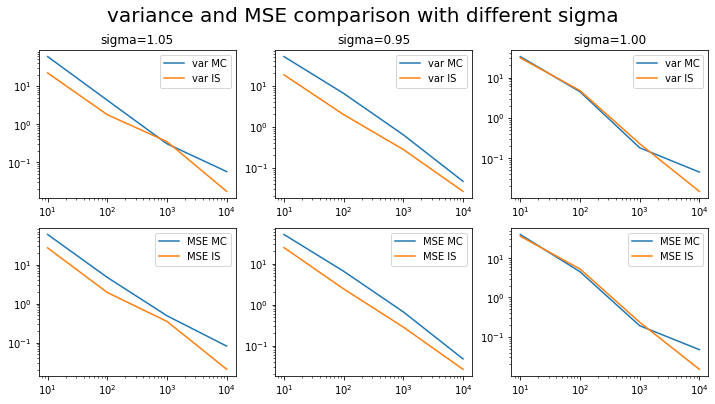

In [484]:
fig,ax=plt.subplots(2,3,figsize=(12,6))
sns.lineplot(x=ex,y=CMCvar105,label='var MC',ax=ax[0,0])
sns.lineplot(x=ex,y=ISvar105, label='var IS',ax=ax[0,0])
sns.lineplot(x=ex,y=CMCMSE105, label='MSE MC',ax=ax[1,0])
sns.lineplot(x=ex,y=ISMSE105, label='MSE IS',ax=ax[1,0])
sns.lineplot(x=ex,y=CMCvar095,label='var MC',ax=ax[0,1])
sns.lineplot(x=ex,y=ISvar095, label='var IS',ax=ax[0,1])
sns.lineplot(x=ex,y=CMCMSE095, label='MSE MC',ax=ax[1,1])
sns.lineplot(x=ex,y=ISMSE095, label='MSE IS',ax=ax[1,1])
sns.lineplot(x=ex,y=CMCvar,label='var MC',ax=ax[0,2])
sns.lineplot(x=ex,y=ISvar, label='var IS',ax=ax[0,2])
sns.lineplot(x=ex,y=CMCMSE, label='MSE MC',ax=ax[1,2])
sns.lineplot(x=ex,y=ISMSE, label='MSE IS',ax=ax[1,2])
ax[0,0].set(xscale='log',yscale='log')
ax[1,0].set(xscale='log',yscale='log')
ax[0,2].set(xscale='log',yscale='log')
ax[1,2].set(xscale='log',yscale='log')
ax[0,1].set(xscale='log',yscale='log')
ax[1,1].set(xscale='log',yscale='log')
fig.suptitle('variance and MSE comparison with different sigma',size=20)
ax[0,0].set_title('sigma=1.05')
ax[0,1].set_title('sigma=0.95')
ax[0,2].set_title('sigma=1.00')
plt.show()

## Part b: add the importance sampling to Robbins-Monro algorithm

In [365]:
#Robbins Monro with importance sampling
t=np.linspace(0,T,51)
m=50
dt=T/m
al=[]
N=100
tot=100
for k in range(tot):
    sig=[0.95]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            s, S_int=genSbar2(sig[i-1],t,m,-1)
            ratio=fdivg(S_int,r,-1,sig[i-1],dt)
            fun.append(f(s)*ratio-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al.append(sig)
good=np.array(al)

0
1
2
3
4
5
6
7
8
9


In [50]:
#with normal crude monte carlo
t=np.linspace(0,T,51)
m=50
everybad=[]
tot=100
for k in range(tot):
    sigbad=[0.95]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(10):
            s,_=genSbar2(sigbad[i-1],t,m,r)
            fun.append(f(s)-Im)
        jhat=np.mean(fun)
        sigbad.append(sigbad[i-1]-alphai*jhat)
    everybad.append(sigbad)
bad=np.array(everybad)   

In [546]:
ex=[]
cmcmean=[]
cmcv=[]
ISmean=[]
ISv=[]
ISsme=[]
cmcMSE=[]
for i in range(10,1000):
    ex.append(i)
    cmcmean.append(np.mean(bad[:,i]))
    ISmean.append(np.mean(good[:,i]))
    cmcv.append(np.var(bad[:,i]))
    ISv.append(np.var(good[:,i]))
    ISsme.append(np.mean((good[:,i]-0.99305256)**2))
    cmcMSE.append(np.mean((bad[:,i]-0.99305256)**2))

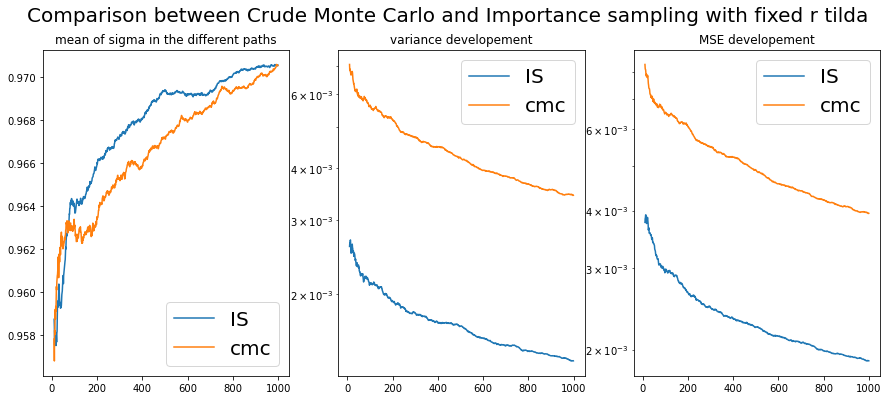

In [553]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.lineplot(x=ex,y=ISmean,ax=ax[0], label='IS')
sns.lineplot(x=ex,y=cmcmean,ax=ax[0], label='cmc')
sns.lineplot(x=ex,y=ISv,ax=ax[1],label='IS')
sns.lineplot(x=ex,y=cmcv,ax=ax[1],label='cmc')
sns.lineplot(x=ex,y=ISsme,ax=ax[2],label='IS')
sns.lineplot(x=ex,y=cmcMSE,ax=ax[2],label='cmc')
ax[2].set(yscale='log')
ax[1].set(yscale='log')
ax[0].set_title('mean of sigma in the different paths')
ax[1].set_title('variance developement')
ax[2].set_title('MSE developement')
plt.suptitle('Comparison between Crude Monte Carlo and Importance sampling with fixed r tilda',size=20)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
ax[2].legend(fontsize=20)
plt.show()

# Exercise 2.2.7

Let's first generate a random list of seeds

In [238]:
seeds=[]
i=0
N=10000
while i<N:
    rand=np.random.randint(1,100000)
    if np.logical_not(rand in seeds):
        seeds.append(rand)
        i+=1
len(seeds)        

10000

### Process of creation of the r-tilda function for different sigmas

Here I find the best r for different sigma

In [171]:
sigm=np.linspace(0.1,5,15)
myval=[]
for i in range(15):
    def myfunc(nu):
        sig=sigm[i]
        t=np.linspace(0,T,51)
        r=0.05
        m=50
        dt=T/m
        elements=[]
        for n in range(100):
            s,S=genSbarseed(sig,t,m,r, seeds[n])
            elements.append(f(s)**2*fdivg(S,r,nu,sig,dt))
        return np.mean(elements)
    myval.append(minimize(myfunc,r).x)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Interpolate

In [240]:
rtil=interp1d(sigm,myval,kind='cubic')

Text(0.5, 1.0, 'function of best r-tilde')

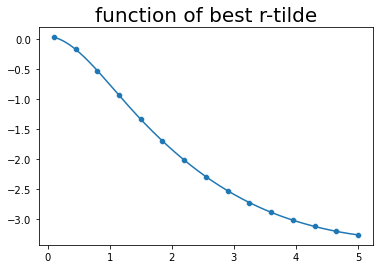

In [552]:
sns.scatterplot(x=sigm,y=myval)
sns.lineplot(x=np.linspace(0.1,5,1000),y=rtil(np.linspace(0.1,5,1000)))
plt.title('function of best r-tilde',size=20)

This is my interpolation function

Now let's apply it to my problem

### Implementation of the new algorithm and comparison of it with the old one

In [364]:
#Robbins Monro with interpolated function importance sampling
t=np.linspace(0,T,51)
K=150
a0=2/(K+S0)
Im=50
m=50
dt=T/m
al=[]
N=100
tot=100
for k in range(tot):
    sig=[0.95]
    for i in range(1,1000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            s, S_int=genSbar2(sig[i-1],t,m,rtil(sig[i-1]))
            ratio=fdivg(S_int,r,rtil(sig[i-1]),sig[i-1],dt)
            fun.append(f(s)*ratio-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al.append(sig)
supergood=np.array(al)

0
1
2
3
4
5
6
7
8
9


In [554]:
ex=[]
SISmean=[]
SISv=[]
ISmean=[]
ISv=[]
SISMSE=[]
ISsme=[]
for i in range(10,1000):
    ex.append(i)
    SISmean.append(np.mean(supergood[:,i]))
    ISmean.append(np.mean(good[:,i]))
    SISv.append(np.var(supergood[:,i]))
    ISv.append(np.var(good[:,i]))
    SISMSE.append(np.mean((supergood[:,i]-0.99305256)**2))
    ISsme.append(np.mean((good[:,i]-0.99305256)**2))

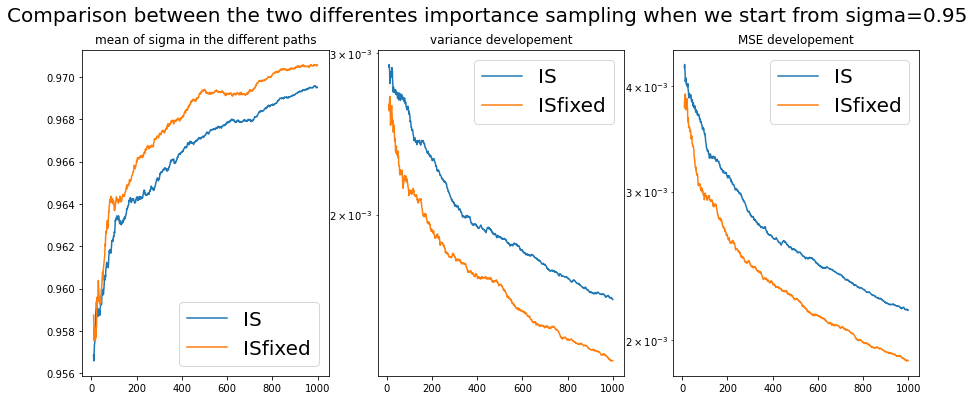

In [555]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.lineplot(x=ex,y=SISmean,ax=ax[0],label='IS')
sns.lineplot(x=ex,y=ISmean,ax=ax[0], label='ISfixed')
sns.lineplot(x=ex,y=SISv,ax=ax[1],label='IS')
sns.lineplot(x=ex,y=ISv,ax=ax[1],label='ISfixed')
sns.lineplot(x=ex,y=SISMSE,ax=ax[2],label='IS')
sns.lineplot(x=ex,y=ISsme,ax=ax[2],label='ISfixed')
ax[2].set(yscale='log')
ax[1].set(yscale='log')
ax[0].set_title('mean of sigma in the different paths')
ax[1].set_title('variance developement')
ax[2].set_title('MSE developement')
plt.suptitle('Comparison between the two differentes importance sampling when we start from sigma=0.95',size=20)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
ax[2].legend(fontsize=20)
plt.show()

In [556]:
#Robbins Monro with interpolated function importance sampling
t=np.linspace(0,T,51)
K=150
a0=2/(K+S0)
Im=50
m=50
dt=T/m
al=[]
N=10
tot=10
for k in range(tot):
    sig=[0.7]
    for i in range(1,5000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            s, S_int=genSbar2(sig[i-1],t,m,rtil(sig[i-1]))
            ratio=fdivg(S_int,r,rtil(sig[i-1]),sig[i-1],dt)
            fun.append(f(s)*ratio-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al.append(sig)
supergood3=np.array(al)

In [557]:
#Robbins Monro with importance sampling
t=np.linspace(0,T,51)
m=50
dt=T/m
al=[]
N=10
tot=10
for k in range(tot):
    sig=[0.7]
    for i in range(1,5000):
        alphai=a0/i**p
        fun=[]
        for n in range(N):
            s, S_int=genSbar2(sig[i-1],t,m,-1)
            ratio=fdivg(S_int,r,-1,sig[i-1],dt)
            fun.append(f(s)*ratio-Im)
        jhat=np.mean(fun)
        sig.append(sig[i-1]-alphai*jhat)
    al.append(sig)
good3=np.array(al)

In [559]:
ex=[]
SISmean=[]
SISv=[]
ISmean=[]
ISv=[]
SISMSE=[]
ISsme=[]
for i in range(10,5000):
    ex.append(i)
    SISmean.append(np.mean(supergood3[:,i]))
    ISmean.append(np.mean(good3[:,i]))
    SISv.append(np.var(supergood3[:,i]))
    ISv.append(np.var(good3[:,i]))
    SISMSE.append(np.mean((supergood3[:,i]-0.99305256)**2))
    ISsme.append(np.mean((good3[:,i]-0.99305256)**2))

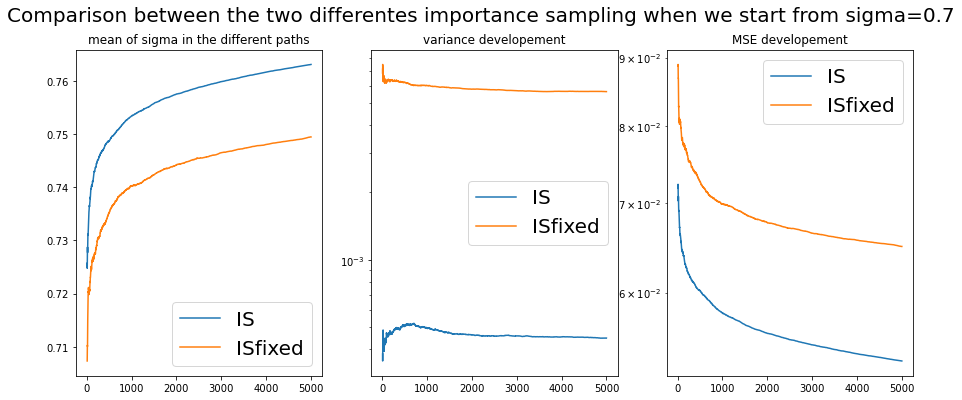

In [562]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.lineplot(x=ex,y=SISmean,ax=ax[0],label='IS')
sns.lineplot(x=ex,y=ISmean,ax=ax[0], label='ISfixed')
sns.lineplot(x=ex,y=SISv,ax=ax[1],label='IS')
sns.lineplot(x=ex,y=ISv,ax=ax[1],label='ISfixed')
sns.lineplot(x=ex,y=SISMSE,ax=ax[2],label='IS')
sns.lineplot(x=ex,y=ISsme,ax=ax[2],label='ISfixed')
ax[2].set(yscale='log')
ax[1].set(yscale='log')
ax[0].set_title('mean of sigma in the different paths')
ax[1].set_title('variance developement')
ax[2].set_title('MSE developement')
plt.suptitle('Comparison between the two differentes importance sampling when we start from sigma=0.7',size=20)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
ax[2].legend(fontsize=20)
plt.show()

It is absolutely logic that actually if we move the starting point far from the point where rtilda=-1 is the best r then the new algorithm starts to work absolutely better than the previous one

## Final plot with the three models compared with sigma=0.7 as starting point

In [586]:
#with normal crude monte carlo
t=np.linspace(0,T,51)
m=50
everybad=[]
tot=10
for k in range(tot):
    sigbad=[0.7]
    for i in range(1,5000):
        alphai=a0/i**p
        fun=[]
        for n in range(10):
            s,_=genSbar2(sigbad[i-1],t,m,r)
            fun.append(f(s)-Im)
        jhat=np.mean(fun)
        sigbad.append(sigbad[i-1]-alphai*jhat)
    everybad.append(sigbad)
bad3=np.array(everybad) 

In [587]:
ex=[]
cmcmean=[]
cmcv=[]
ISmean=[]
ISv=[]
ISsme=[]
cmcMSE=[]
SISmean=[]
SISv=[]
SISMSE=[]
for i in range(10,5000):
    ex.append(i)
    cmcmean.append(np.mean(bad3[:,i]))
    ISmean.append(np.mean(good3[:,i]))
    cmcv.append(np.var(bad3[:,i]))
    ISv.append(np.var(good3[:,i]))
    ISsme.append(np.mean((good3[:,i]-0.99305256)**2))
    cmcMSE.append(np.mean((bad3[:,i]-0.99305256)**2))
    SISmean.append(np.mean(supergood3[:,i]))
    SISv.append(np.var(supergood3[:,i]))
    SISMSE.append(np.mean((supergood3[:,i]-0.99305256)**2))

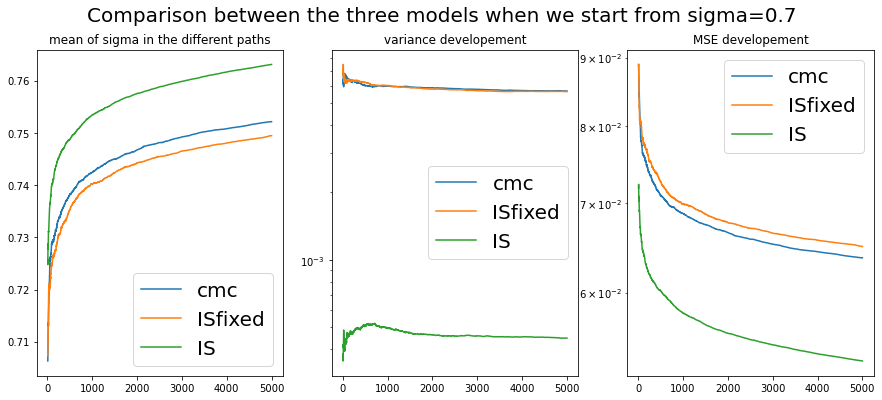

In [588]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.lineplot(x=ex,y=cmcmean,ax=ax[0],label='cmc')
sns.lineplot(x=ex,y=ISmean,ax=ax[0], label='ISfixed')
sns.lineplot(x=ex,y=SISmean,ax=ax[0],label='IS')
sns.lineplot(x=ex,y=cmcv,ax=ax[1],label='cmc')
sns.lineplot(x=ex,y=ISv,ax=ax[1],label='ISfixed')
sns.lineplot(x=ex,y=SISv,ax=ax[1],label='IS')
sns.lineplot(x=ex,y=cmcMSE,ax=ax[2],label='cmc')
sns.lineplot(x=ex,y=ISsme,ax=ax[2],label='ISfixed')
sns.lineplot(x=ex,y=SISMSE,ax=ax[2],label='IS')
ax[2].set(yscale='log')
ax[1].set(yscale='log')
ax[0].set_title('mean of sigma in the different paths')
ax[1].set_title('variance developement')
ax[2].set_title('MSE developement')
plt.suptitle('Comparison between the three models when we start from sigma=0.7',size=20)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
ax[2].legend(fontsize=20)
plt.show()